In [14]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>
# 测验 2 - 获得炒作'

<ul>
<li>将此作为您工作的起点，但要在 Moodle 上回答问题。
<li> 将其发布到您的 GitHub 并在 Moodle 上提交问题中的链接。
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance


## 可能有用的信息

#### 数据字典
<ul>
<li>credit.policy：如果客户满足 LendingClub.com 的信用承保条件，则为 1，否则为 0。
<li>用途：贷款用途（取值“credit_card”、“debt_consolidation”、“educational”、“major_purchase”、“small_business”和“all_other”）。
<li>int.rate：贷款利率，以比例表示（11% 的利率将存储为 0.11）。 LendingClub.com 判断为风险更大的借款人会获得更高的利率。
<li>分期付款：如果贷款到位，借款人每月所欠的分期付款。
<li>log.annual.inc：借款人自报年收入的自然对数。
<li>dti：借款人的债务收入比率（债务金额除以年收入）。
<li>fico：借款人的 FICO 信用评分。
<li>days.with.cr.line：借款人拥有信用额度的天数。
<li>revol.bal：借款人的循环余额（信用卡结算周期结束时未支付的金额）。
<li>revol.util：借款人的循环额度利用率（使用的信贷额度相对于可用信贷总额）。
<li>inq.last.6mths：借款人在过去 6 个月内被债权人查询的次数。
<li>not.fully.paid：如果借款人未能偿还贷款，则为 1，如果他们没有还款，则为 0
</ul>

#### FICO 分数组

![FICO](fico_range.png "FICO 范围")

#### 关于方差分析的注意事项 - 可能有用，可能没有

> @JeremyMiles 是对的。首先，有一条经验法则，只要最大方差不超过最小方差的 4 倍，ANOVA 就对方差的异质性具有鲁棒性。此外，方差异质性的一般影响是降低方差分析的效率。也就是说，您将拥有较低的功率。由于无论如何您都会产生重大影响，因此这里没有理由担心。
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [15]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


### Visualize/Explore Data - If You Want, You Do You

## Solutions

In [16]:
#1
#get the data
notpaid=df[df['not.fully.paid']==1]
paid=df[df['not.fully.paid']==0]
notpaid1=notpaid['fico']
paid1=paid['fico']

In [17]:
stat, pval = ss.ttest_ind(notpaid1, paid1)
stat, pval

(-14.812743547869088, 4.227100096647354e-49)

In [18]:
cutoff = .05
if pval < cutoff:
    print("Reject null hypothesis - Effect appears significant")
else:
    print("Accept null hypothesis - Effect may be due to random chance")

Reject null hypothesis - Effect appears significant


<AxesSubplot:xlabel='fico', ylabel='Count'>

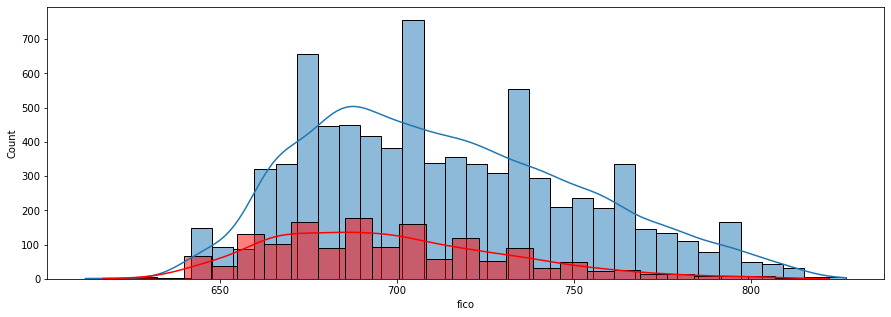

In [20]:
sns.histplot(paid1, kde=True )
sns.histplot(notpaid1, kde=True, color='red')

In [22]:
cr=df[df['credit.policy']==1]
notcr=df[df['credit.policy']==0]
cr_fico=cr['fico']
notcr_fico=notcr['fico']

cr_in=cr['log.annual.inc']
notcr_in=notcr['log.annual.inc']

from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(cr_in, notcr_in)
alpha = .05
nobs = cr_in.count() + notcr_in.count()
pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)
pow, ces

n = powerTest.solve_power(ces, power=.85, nobs=None, alpha=alpha)
n

1157.6455504969408

In [23]:
income=np.exp(df['log.annual.inc'])
inc_mean=income.mean()
print(inc_mean)

68402.03071015503


In [26]:
df["income"]=np.exp(df["log.annual.inc"])

In [27]:
print(df["income"].skew(),
df['days.with.cr.line'].skew(),
df['fico'].skew())

9.59354898996782 1.1557482270969546 0.4712597399323796


In [39]:
bins = np.array([300, 580, 670, 740, 800])
indicies = np.digitize(df["fico"], bins)
groups = df.groupby(indicies)
for i, group in groups:
    print(i, group["fico"].min(), len(group), np.exp(group["log.annual.inc"]).mean())


2 612 1341 60231.432107263354
3 672 6007 67593.95498610557
4 742 2085 74025.49061873481
5 802 145 96581.13203052751


In [40]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,income
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,85000.000385
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,65000.000073
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,31999.999943
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,85000.000385
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,80799.999636


In [41]:
print(groups["log.annual.inc"].var())
print(groups["log.annual.inc"].count())

2    0.371378
3    0.375231
4    0.365343
5    0.456305
Name: log.annual.inc, dtype: float64
2    1341
3    6007
4    2085
5     145
Name: log.annual.inc, dtype: int64


In [48]:
varStat,varP=ss.levene(df["fico"],df["log.annual.inc"])
stat,pval=ss.f_oneway(df["fico"],df["log.annual.inc"])
stat,pval 

(3253547.1781296483, 0.0)

In [51]:
print('poor: 0', 'fair:', 1341/df["log.annual.inc"].count(),'good:',6007/df["log.annual.inc"].count()
,'verygood:',2085/df["log.annual.inc"].count(),'exceptinal:',145/df["log.annual.inc"].count())

poor: 0 fair: 0.14000835247442053 good: 0.6271664230528294 verygood: 0.21768636458550847 exceptinal: 0.015138859887241595


https://blog.csdn.net/weixin_43442290/article/details/105745113

In [55]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,income
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,85000.000385
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,65000.000073
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,31999.999943
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,85000.000385
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0,80799.999636


In [97]:
df2 = df.apply(pd.to_numeric, errors='coerce')
df2 = df2.drop(columns=["purpose"])
df2 = df2.corr()
df2.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid,income
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.158119,-0.008860
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.159552,0.039003
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,0.049955,0.312877
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,-0.033439,0.776930
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,0.037362,-0.109705


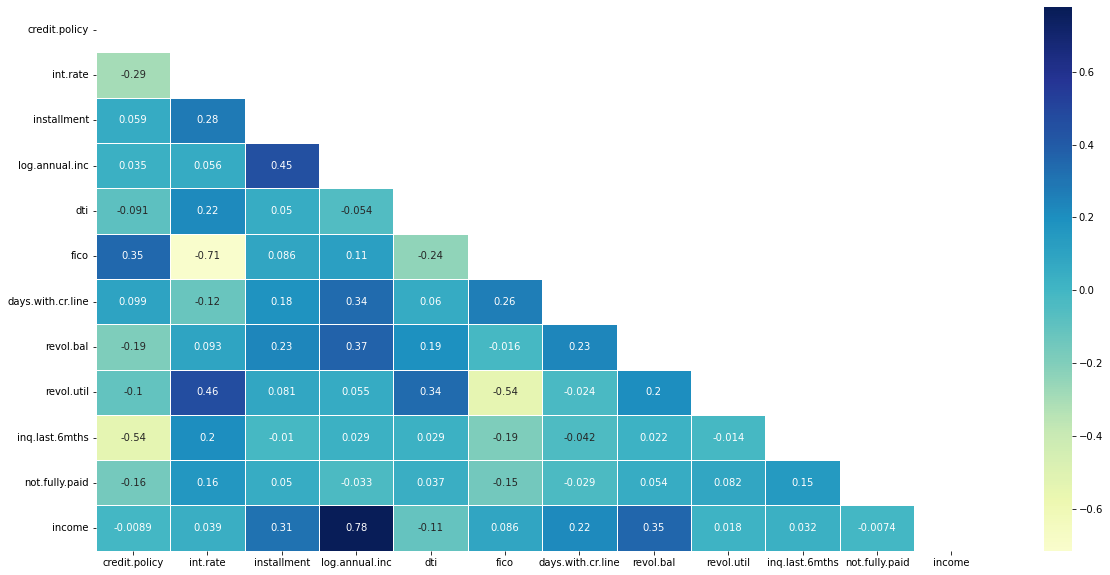

In [98]:
mask = np.triu(np.ones_like(df2, dtype=bool))
sns.heatmap(df2, center=0, linewidths=.5,annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()